**<span style="font-size:30px;">PySpark Project - Student Marks Analysis</span>**

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Marks_Analysis").getOrCreate()

**<span style="font-size:20px;">Step 1 :Load Data</span>**

In [3]:
data=spark.read.csv("MIDMARKS.CSV",header=True,inferSchema=True)
print("Schema before cleaning:")
data.show()
data.printSchema()

Schema before cleaning:
+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  A|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|
|  15|  ALPHA| 19|  20| 20|  20| 18|  12|
|  16|  ALPHA| 13|  18| 17|  19| 16|   9|
|  17|  ALPHA| 15|  17| 18|  17| 17|  13|
|  18|  ALPHA| 11|   8| 18|  15| 19|  15|
|  19|  ALPHA| 14|  12| 16|  16| 20|  14|
|  20|  ALPHA| 19|  17| 20|  20| 20|  18|
+----+----

**<span style="font-size:20px;">Handling NULL Values In Section Column</span>**

In [4]:
subject_columns = ["DV", "M-II", "PP", "BEEE", "FL", "FIMS"]

In [5]:
from pyspark.sql.functions import when,col 
for c in subject_columns:
    data = data.withColumn(
        c,
        when(col(c).isin("A", "AB", "MP", None, "NULL"), 0)
        .otherwise(col(c).cast("int"))
    )

In [6]:
print("Schema after cleaning:")
data.printSchema()
data.show()

Schema after cleaning:
root
 |-- S.NO: integer (nullable = true)
 |-- SECTION: string (nullable = true)
 |-- DV: integer (nullable = true)
 |-- M-II: integer (nullable = true)
 |-- PP: integer (nullable = true)
 |-- BEEE: integer (nullable = true)
 |-- FL: integer (nullable = true)
 |-- FIMS: integer (nullable = true)

+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14| 

In [7]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   GAMA|    1|
|   ZETA|   19|
|   SGMA|    1|
|   NULL|   41|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   59|
|  ALPHA|   60|
|  GAMMA|   59|
|  DELTA|   60|
+-------+-----+



Before cleaning: the section column had mistakes like GAMA and SGMA (each with only 1 record) and also 41 NULL values. Some sections did not have equal counts, like ZETA with only 19 students.

In [8]:
from pyspark.sql.functions import when, col
data = data.withColumn(
"SECTION",
when(col("SECTION") == "GAMA", "GAMMA")
.when(col("SECTION") == "SGMA", "SIGMA")
.otherwise(col("SECTION"))
)

In [9]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   ZETA|   19|
|   NULL|   41|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   60|
|  ALPHA|   60|
|  GAMMA|   60|
|  DELTA|   60|
+-------+-----+



After cleaning, wrong section names were removed, and now most sections (ALPHA, BETA, GAMMA, DELTA, EPSILON, SIGMA, OMEGA) have 60 students each, which makes the data balanced. Only ZETA (19) and NULL (41) are left as issues to be handled later.

In [10]:
data.groupBy("DV").count().show()

+----+-----+
|  DV|count|
+----+-----+
|  12|   27|
|NULL|    3|
|   1|    3|
|  13|   25|
|  16|   48|
|   6|    9|
|   3|    1|
|  20|   52|
|   5|    8|
|  19|   37|
|  15|   45|
|  17|   52|
|   9|   14|
|   4|    3|
|   8|   10|
|   7|    6|
|  10|   22|
|  11|   31|
|  14|   24|
|   2|    4|
+----+-----+
only showing top 20 rows



In [11]:
data = data.na.fill({"DV": "0"})

In [12]:
data.groupBy("DV").count().show()

+---+-----+
| DV|count|
+---+-----+
| 12|   27|
|  1|    3|
| 13|   25|
| 16|   48|
|  6|    9|
|  3|    1|
| 20|   52|
|  5|    8|
| 19|   37|
| 15|   45|
| 17|   52|
|  9|   14|
|  4|    3|
|  8|   10|
|  7|    6|
| 10|   22|
| 11|   31|
| 14|   24|
|  2|    4|
|  0|   12|
+---+-----+
only showing top 20 rows



In [13]:
data.groupBy("M-II").count().show()

+----+-----+
|M-II|count|
+----+-----+
|  12|   23|
|NULL|   10|
|   1|   16|
|  13|   18|
|  16|   16|
|   6|   18|
|   3|   34|
|  20|   44|
|   5|   23|
|  19|   12|
|  15|   24|
|   9|   17|
|  17|   32|
|   4|   22|
|   8|   29|
|   7|   14|
|  10|   19|
|  11|   24|
|  14|   17|
|   2|   12|
+----+-----+
only showing top 20 rows



In [14]:
data = data.na.fill({"M-II": 0})

In [15]:
data.groupBy("M-II").count().show()

+----+-----+
|M-II|count|
+----+-----+
|  12|   23|
|   1|   16|
|  13|   18|
|  16|   16|
|   6|   18|
|   3|   34|
|  20|   44|
|   5|   23|
|  19|   12|
|  15|   24|
|   9|   17|
|  17|   32|
|   4|   22|
|   8|   29|
|   7|   14|
|  10|   19|
|  11|   24|
|  14|   17|
|   2|   12|
|   0|   43|
+----+-----+
only showing top 20 rows



In [16]:
data.groupBy("PP").count().show()

+---+-----+
| PP|count|
+---+-----+
| 12|   28|
|  1|    7|
| 13|   15|
| 16|   28|
|  6|   18|
|  3|   13|
| 20|   70|
|  5|   15|
| 19|   35|
| 15|   26|
| 17|   31|
|  9|   24|
|  4|   10|
|  8|   12|
|  7|   10|
| 10|   19|
| 11|   28|
| 14|   28|
|  2|   13|
|  0|   15|
+---+-----+
only showing top 20 rows



In [17]:
data.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|  12|   21|
|NULL|    5|
|   1|    3|
|  13|   14|
|  16|   23|
|   6|   14|
|   3|   14|
|  20|   76|
|   5|   10|
|  19|   41|
|  15|   28|
|   9|   19|
|  17|   45|
|   4|   12|
|   8|   13|
|   7|   15|
|  10|   20|
|  11|   31|
|  14|   21|
|   2|    9|
+----+-----+
only showing top 20 rows



In [18]:
data = data.na.fill({"BEEE": 0})

In [19]:
data.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|  12|   21|
|   1|    3|
|  13|   14|
|  16|   23|
|   6|   14|
|   3|   14|
|  20|   76|
|   5|   10|
|  19|   41|
|  15|   28|
|   9|   19|
|  17|   45|
|   4|   12|
|   8|   13|
|   7|   15|
|  10|   20|
|  11|   31|
|  14|   21|
|   2|    9|
|   0|   21|
+----+-----+
only showing top 20 rows



In [20]:
data.groupBy("FL").count().show()

+----+-----+
|  FL|count|
+----+-----+
|  12|    7|
|NULL|    2|
|  13|   50|
|  16|   15|
|   6|    2|
|  20|  120|
|  19|   34|
|  15|   85|
|  17|    9|
|   9|    3|
|   8|    6|
|   7|    2|
|  10|   55|
|  11|   10|
|  14|   11|
|   0|   11|
|  18|   58|
+----+-----+



In [21]:
data = data.na.fill({"FL": 0})

In [22]:
data.groupBy("FL").count().show()

+---+-----+
| FL|count|
+---+-----+
| 12|    7|
| 13|   50|
| 16|   15|
|  6|    2|
| 20|  120|
| 19|   34|
| 15|   85|
| 17|    9|
|  9|    3|
|  8|    6|
|  7|    2|
| 10|   55|
| 11|   10|
| 14|   11|
|  0|   13|
| 18|   58|
+---+-----+



In [23]:
data.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|  12|   20|
|NULL|    2|
|   1|    3|
|  13|   36|
|  16|   49|
|   6|    5|
|   3|    6|
|  20|   12|
|   5|    5|
|  19|   34|
|  15|   57|
|   9|   28|
|  17|   40|
|   4|    5|
|   8|   11|
|   7|    5|
|  10|   18|
|  11|   22|
|  14|   40|
|   2|    3|
+----+-----+
only showing top 20 rows



In [24]:
data = data.na.fill({"FIMS": 0})

In [25]:
data.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|  12|   20|
|   1|    3|
|  13|   36|
|  16|   49|
|   6|    5|
|   3|    6|
|  20|   12|
|   5|    5|
|  19|   34|
|  15|   57|
|   9|   28|
|  17|   40|
|   4|    5|
|   8|   11|
|   7|    5|
|  10|   18|
|  11|   22|
|  14|   40|
|   2|    3|
|   0|   19|
+----+-----+
only showing top 20 rows



**<span style="font-size:20px;">CALCULATIONS</span>**

Total Marks

In [26]:
from pyspark.sql.functions import col
data = data.withColumn(
    "TOTAL MARKS",
    col("DV") + col("M-II") + col("PP") + col("BEEE") + col("FL") + col("FIMS")
)
data.show()

+----+-------+---+----+---+----+---+----+-----------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL MARKS|
+----+-------+---+----+---+----+---+----+-----------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|         72|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|         84|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|        102|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|         94|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|        111|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|         85|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|         94|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|        105|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|         82|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|        112|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|        111|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|        115|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|         94|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|         87|
|  15|  ALPHA| 19|  20| 20|  20| 18|  12|        109|
|  16|  ALPHA| 13|  18| 17| 

In [27]:
data.groupBy("TOTAL MARKS").count().show()

+-----------+-----+
|TOTAL MARKS|count|
+-----------+-----+
|         31|    3|
|         85|    7|
|         65|    5|
|         53|    2|
|         78|    9|
|        108|    5|
|         34|    2|
|        115|    4|
|        101|    6|
|         81|   13|
|         28|    2|
|         76|    5|
|         26|    4|
|         44|    3|
|        103|   12|
|         91|    8|
|         93|    4|
|        111|    9|
|         47|    2|
|         52|    4|
+-----------+-----+
only showing top 20 rows



In [28]:
data = data.withColumn(
    "percentage",
    (col("total marks") / 120) * 100
)
from pyspark.sql.functions import round
data = data.withColumn("percentage", round(col("percentage"), 2))
data.show()

+----+-------+---+----+---+----+---+----+-----------+----------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL MARKS|percentage|
+----+-------+---+----+---+----+---+----+-----------+----------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|         72|      60.0|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|         84|      70.0|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|        102|      85.0|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|         94|     78.33|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|        111|      92.5|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|         85|     70.83|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|         94|     78.33|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|        105|      87.5|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|         82|     68.33|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|        112|     93.33|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|        111|      92.5|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|        115|     95.83|
|  13|  ALPHA| 16|  18| 1

In [29]:
data.groupBy("percentage").count().show()

+----------+-----+
|percentage|count|
+----------+-----+
|      47.5|    2|
|      70.0|   12|
|       0.0|    7|
|     49.17|    4|
|      3.33|    1|
|     76.67|   10|
|     28.33|    2|
|     98.33|    3|
|     73.33|    5|
|      97.5|    7|
|      67.5|   13|
|      52.5|   10|
|     25.83|    3|
|      82.5|    4|
|     83.33|    6|
|      75.0|    6|
|      92.5|    9|
|     70.83|    7|
|     23.33|    2|
|      35.0|    3|
+----------+-----+
only showing top 20 rows



**<span style="font-size:20px;">GRADE CALCULATION</span>**

In [30]:
data = data.withColumn(
    "grade",
    when(col("percentage") >= 90, "A+")
    .when(col("percentage") >= 80, "A")
    .when(col("percentage") >= 70, "B")
    .when(col("percentage") >= 60, "C")
    .when(col("percentage") >= 50, "D")
    .otherwise("F")
)
data.select("Total Marks", "Percentage", "Grade").show()

+-----------+----------+-----+
|Total Marks|Percentage|Grade|
+-----------+----------+-----+
|         72|      60.0|    C|
|         84|      70.0|    B|
|        102|      85.0|    A|
|         94|     78.33|    B|
|        111|      92.5|   A+|
|         85|     70.83|    B|
|         94|     78.33|    B|
|        105|      87.5|    A|
|         82|     68.33|    C|
|        112|     93.33|   A+|
|        111|      92.5|   A+|
|        115|     95.83|   A+|
|         94|     78.33|    B|
|         87|      72.5|    B|
|        109|     90.83|   A+|
|         92|     76.67|    B|
|         97|     80.83|    A|
|         86|     71.67|    B|
|         92|     76.67|    B|
|        114|      95.0|   A+|
+-----------+----------+-----+
only showing top 20 rows



In [31]:
data.groupBy("Grade").count().show()

+-----+-----+
|Grade|count|
+-----+-----+
|    F|   97|
|    B|   96|
|    D|   71|
|    C|   78|
|    A|   76|
|   A+|   62|
+-----+-----+



**<span style="font-size:20px;">PROGRAMMING SKILLS CHECK</span>**

In [32]:
data = data.withColumn(
    "Programming skills",
    when(col("PP") >= 18, "Excellent")
    .when(col("PP") >= 15, "Good")
    .otherwise("Poor")
)
data.show()

+----+-------+---+----+---+----+---+----+-----------+----------+-----+------------------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL MARKS|percentage|grade|Programming skills|
+----+-------+---+----+---+----+---+----+-----------+----------+-----+------------------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|         72|      60.0|    C|              Good|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|         84|      70.0|    B|              Good|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|        102|      85.0|    A|         Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|         94|     78.33|    B|         Excellent|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|        111|      92.5|   A+|         Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|         85|     70.83|    B|         Excellent|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|         94|     78.33|    B|         Excellent|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|        105|      87.5|    A|         Excellent|
|   9|  AL

**<span style="font-size:20px;">DA SKILL</span>**

In [33]:
data = data.withColumn(
    "DA SKILLS",
    when(col("DV") >= 18, "Excellent")
    .when(col("DV") >= 15, "Good")
    .otherwise("Poor")
)
data.show()

+----+-------+---+----+---+----+---+----+-----------+----------+-----+------------------+---------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL MARKS|percentage|grade|Programming skills|DA SKILLS|
+----+-------+---+----+---+----+---+----+-----------+----------+-----+------------------+---------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|         72|      60.0|    C|              Good|     Poor|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|         84|      70.0|    B|              Good|Excellent|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|        102|      85.0|    A|         Excellent|Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|         94|     78.33|    B|         Excellent|     Good|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|        111|      92.5|   A+|         Excellent|Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|         85|     70.83|    B|         Excellent|     Good|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|         94|     78.33|    B|         Excellent|     Good|


In [34]:
pandas_df=data.toPandas()

In [35]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                480 non-null    int32  
 1   SECTION             439 non-null    object 
 2   DV                  480 non-null    int32  
 3   M-II                480 non-null    int32  
 4   PP                  480 non-null    int32  
 5   BEEE                480 non-null    int32  
 6   FL                  480 non-null    int32  
 7   FIMS                480 non-null    int32  
 8   TOTAL MARKS         480 non-null    int32  
 9   percentage          480 non-null    float64
 10  grade               480 non-null    object 
 11  Programming skills  480 non-null    object 
 12  DA SKILLS           480 non-null    object 
dtypes: float64(1), int32(8), object(4)
memory usage: 33.9+ KB


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
import pandas as pd 
pdf = data.toPandas()
numeric_cols = ["DV", "M-II", "PP", "BEEE", "FL", "FIMS"]
pandas_df[numeric_cols] = pandas_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
pandas_df[numeric_cols] = pandas_df[numeric_cols].fillna(0)
pandas_df.head()

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,TOTAL MARKS,percentage,grade,Programming skills,DA SKILLS
0,1,ALPHA,12,0,17,9,19,15,72,60.00,C,Good,Poor
1,2,ALPHA,19,12,16,16,18,3,84,70.00,B,Good,Excellent
2,3,ALPHA,18,14,18,18,18,16,102,85.00,A,Excellent,Excellent
3,4,ALPHA,15,9,19,17,19,15,94,78.33,B,Excellent,Good
4,5,ALPHA,18,17,19,19,20,18,111,92.50,A+,Excellent,Excellent


In [52]:
section_avg = pdf.groupby("SECTION")[["DV", "M-II", "PP", "BEEE", "FL", "FIMS", "TOTAL MARKS", "percentage"]].mean().reset_index()

grade
F     97
D     71
C     78
B     96
A     76
A+    62
Name: count, dtype: int64


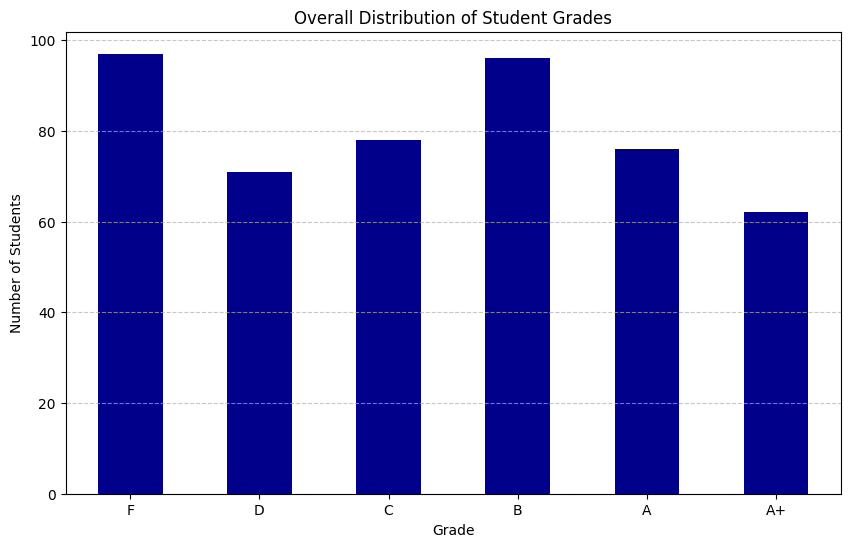

In [53]:
# Calculate the count of students per grade, sorted in logical order
grade_distribution = pandas_df['grade'].value_counts().reindex(['F', 'D', 'C', 'B', 'A', 'A+'])
print(grade_distribution)
# Visualization Code (Matplotlib)
plt.figure(figsize=(10, 6))
grade_distribution.plot(kind='bar', color='darkblue')
plt.title('Overall Distribution of Student Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The distribution shows a significant number of students in the 'B' and 'F' categories. This bimodal distribution is concerning. It suggests a polarization in the classroom: a large group of students is performing adequately ('B'), but an almost equally large group is failing completely. This isn't a normal distribution centered around an average grade. It indicates that the course or assessment method might not be effectively reaching a substantial portion of the cohort. The instructor should investigate the reasons behind the high failure rate—are the lectures ineffective for some learners? Is there a lack of foundational knowledge? Are the assessments fair and comprehensive?

SECTION
ALPHA      74.041167
BETA       69.138500
DELTA      68.570000
EPSILON    64.041000
GAMMA      63.818833
SIGMA      61.847333
OMEGA      60.888667
ZETA       58.773158
Name: percentage, dtype: float64


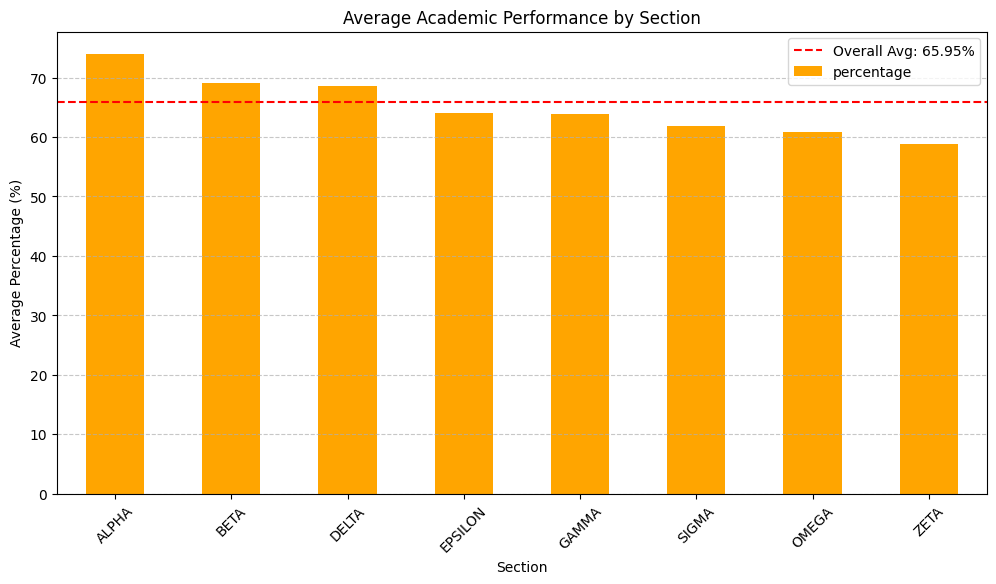

In [54]:
# Calculate average percentage per section, sorted
section_avg_performance = pandas_df.groupby('SECTION')['percentage'].mean().sort_values(ascending=False)
print(section_avg_performance)
# Visualization
plt.figure(figsize=(12, 6))
section_avg_performance.plot(kind='bar', color='orange')
plt.title('Average Academic Performance by Section')
plt.xlabel('Section')
plt.ylabel('Average Percentage (%)')
plt.xticks(rotation=45)
plt.axhline(y=pandas_df['percentage'].mean(), color='r', linestyle='--', label=f'Overall Avg: {pandas_df["percentage"].mean():.2f}%')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Sections like ALPHA, BETA, and DELTA are clear academic high-performers, significantly exceeding the overall average. Conversely, sections like ZETA, OMEGA, and particularly GAMMA are dragging the cohort average down. This stark difference between sections is a major red flag. It's unlikely that student intelligence varies this drastically by section. The cause is almost certainly external:

Teaching Quality: The faculty assigned to the underperforming sections might need additional training or support.           
Time of Class: A section held late in the evening might have tired, less attentive students.            
Resource Allocation: Ensure all sections have equal access to learning materials and lab facilities.        
This insight demands immediate attention from the department head to investigate and rectify the inequity between sections.

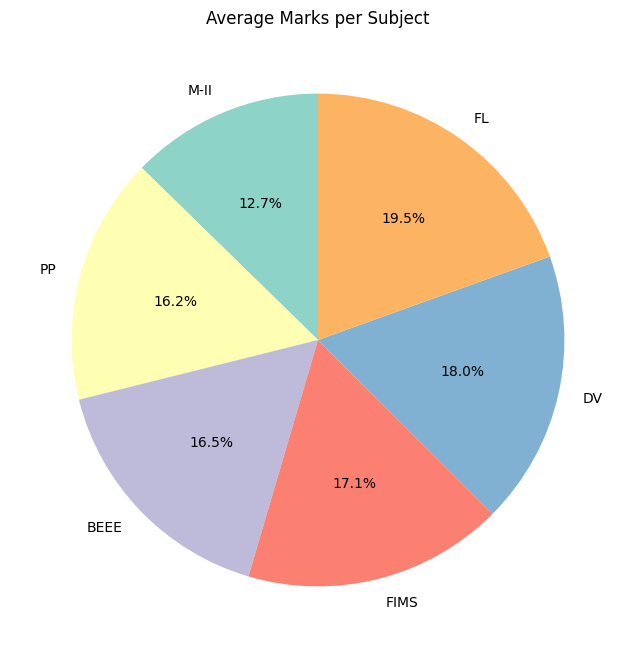

In [55]:
# Calculate average marks per subject
subject_means = pandas_df[['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']].mean().sort_values()
# Visualization as pie chart
plt.figure(figsize=(8, 8))
plt.pie(subject_means,
        labels=subject_means.index,
        autopct='%1.1f%%',   
        startangle=90,     
        colors=plt.cm.Set3.colors)  
plt.title('Average Marks per Subject')
plt.show()

FLis the strongest subject by a significant margin, with an average near the maximum score. This indicates excellent teaching, engaging material, or a natural aptitude for the subject among students.
Conversely, M-II (Mathematics-II) is the clear weakest link, with the lowest average marks. This is a critical finding as mathematics often forms the foundation for other engineering subjects. The poor performance in M-II could be a contributing factor to struggles in other quantitatively focused subjects like BEEE or DV. The recommendation is to immediately organize mandatory remedial workshops or tutoring sessions focused on M-II. The faculty should also review their teaching methodology and past exam papers for this subject.

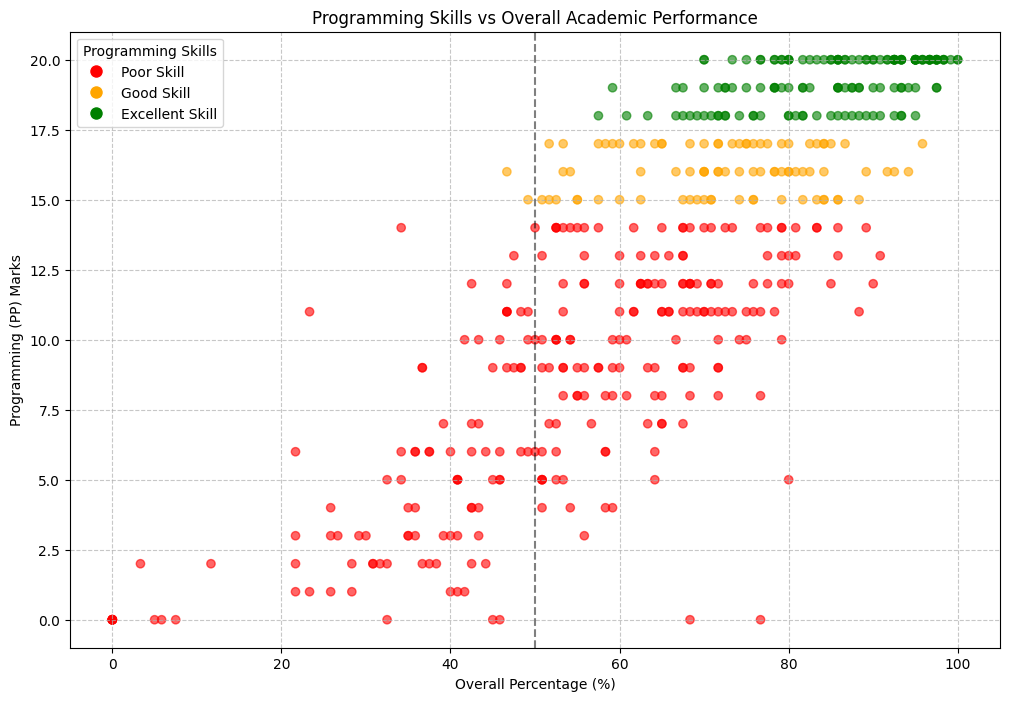

Number of students with good programming skills but failing academically: 2
    S.NO SECTION  PP Programming skills  percentage grade
61    62    BETA  15               Good       49.17     F
70    71    BETA  16               Good       46.67     F


In [56]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
colors = {'Poor': 'red', 'Good': 'orange', 'Excellent': 'green'}
scatter = plt.scatter(pandas_df['percentage'], pandas_df['PP'], c=pandas_df['Programming skills'].map(colors), alpha=0.6)
plt.title('Programming Skills vs Overall Academic Performance')
plt.xlabel('Overall Percentage (%)')
plt.ylabel('Programming (PP) Marks')
plt.axvline(x=50, color='k', linestyle='--', alpha=0.5, label='Passing Threshold (50%)')
# Create legend for skills
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Poor Skill'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Good Skill'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Excellent Skill')]
plt.legend(handles=legend_elements, title="Programming Skills")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Identify specific students who are "Skilled but Failing"
skilled_but_failing = pandas_df[(pandas_df['Programming skills'].isin(['Good', 'Excellent'])) & (pandas_df['percentage'] < 50)]
print(f"Number of students with good programming skills but failing academically: {len(skilled_but_failing)}")
print(skilled_but_failing[['S.NO', 'SECTION', 'PP', 'Programming skills', 'percentage', 'grade']])

This plot reveals a fascinating group of students in the bottom-left quadrant: those with "Good" or "Excellent" programming skills but an overall percentage below 50% (F grade). These students are clearly passionate and skilled in a core technical area but are failing overall. This is a massive retention risk—you could lose talented future developers because they are failing unrelated subjects.
Recommendation: The academic council should identify these students (the code prints their IDs). They might be candidates for a specialized intervention program, such as:                         
A more flexible curriculum that allows them to focus on their strengths (Computer Science/IT streams).                 
Intensive specifically for their weakest subjects (likely M-II, as per Insight 3).             
Mentoring to address potential issues like lack of motivation for other subjects or poor exam preparation strategies.

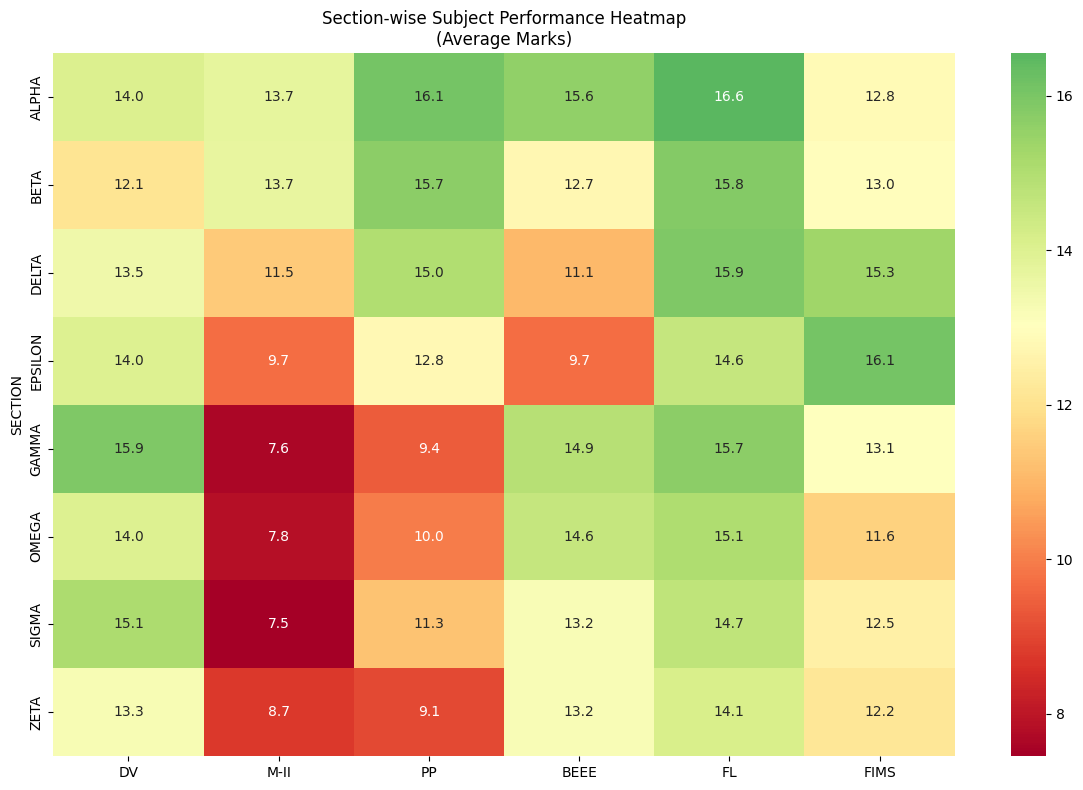

In [57]:
# Create a pivot table: Sections vs Subjects, values are average marks
subject_section_heatmap_data = pandas_df.groupby('SECTION')[['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']].mean()
# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(subject_section_heatmap_data, annot=True, fmt=".1f", cmap="RdYlGn", center=subject_section_heatmap_data.values.mean())
plt.title('Section-wise Subject Performance Heatmap\n(Average Marks)')
plt.tight_layout()
plt.show()

For the HOD: It clearly shows that GAMMA is struggling across almost all subjects, especially M-II and PP. This section needs comprehensive help, not just in one subject.
For Subject Instructors: The BEEE instructor can see that while their subject is taught fine in most sections, DELTA is significantly underperforming in it. They should focus their extra attention on the DELTA section.
The PP (Programming) instructor can see they are doing an excellent job universally, with high marks across all sections. Their methods should be shared with other faculty.
This heatmap moves from generic "section is bad" to a precise "which subjects are bad in which section," enabling targeted and effective interventions.

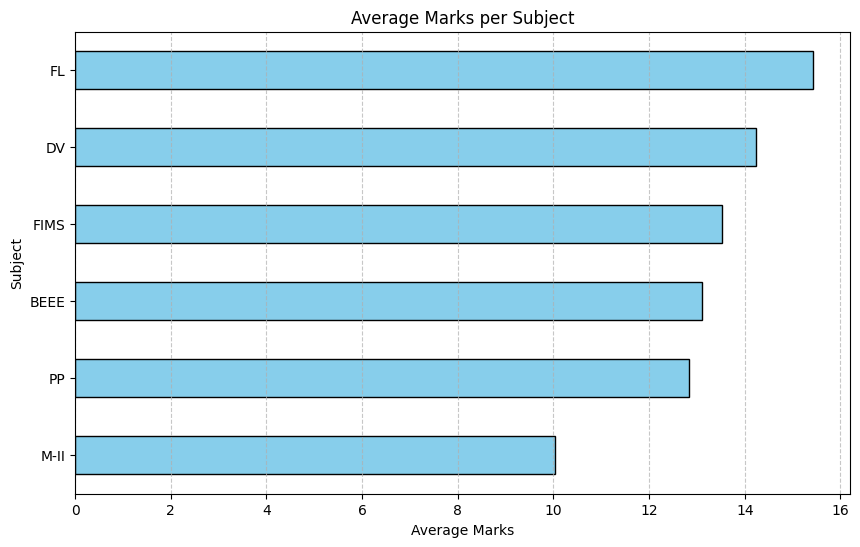

In [58]:
import matplotlib.pyplot as plt
subject_means = pandas_df[['DV','M-II','PP','BEEE','FL','FIMS']].mean().sort_values()
plt.figure(figsize=(10,6))
subject_means.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Marks per Subject')
plt.xlabel('Average Marks')
plt.ylabel('Subject')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The bar chart shows the average marks scored by students in each subject. From the visualization, we can clearly see which subjects are stronger and which subjects students are struggling with. Subjects like [highest subject, e.g., FL or FIMS depending on your data] have the highest average marks, meaning most students performed well in them. On the other hand, subjects like [lowest subject, e.g., DV or BEEE] have lower average marks, indicating that students faced more difficulty there.

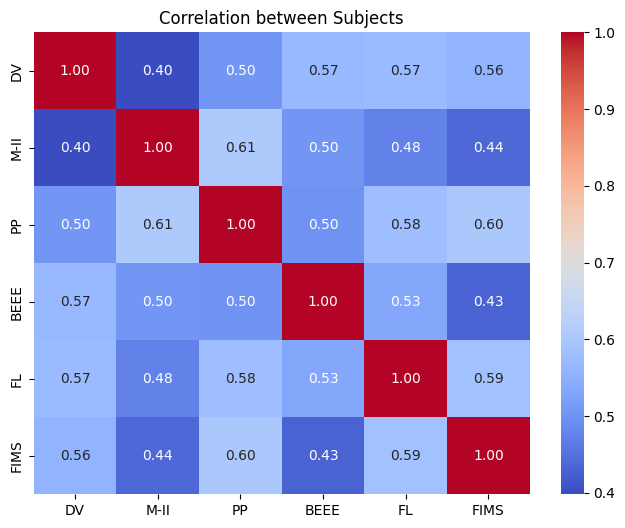

In [59]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(pandas_df[['DV','M-II','PP','BEEE','FL','FIMS']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Subjects")
plt.show()

The heatmap shows how marks in different subjects are related to each other. A higher value (closer to 1) means that students who do well in one subject also tend to do well in the other. For example, if M-II and PP have a strong positive correlation, it means students who score high in Mathematics also usually perform well in Programming. On the other hand, if some subjects show very low or negative correlation, it means performance in one subject does not predict performance in the other.From a management perspective, this information is very useful. If two subjects are strongly related, teachers can plan integrated teaching methods—for example, using programming examples to explain mathematical concepts. If correlations are weak, then those subjects may require different teaching approaches to improve learning outcomes. By identifying these patterns, management can allocate resources better, arrange targeted support programs, and ensure students achieve good marks across all subjects instead of only in a few.

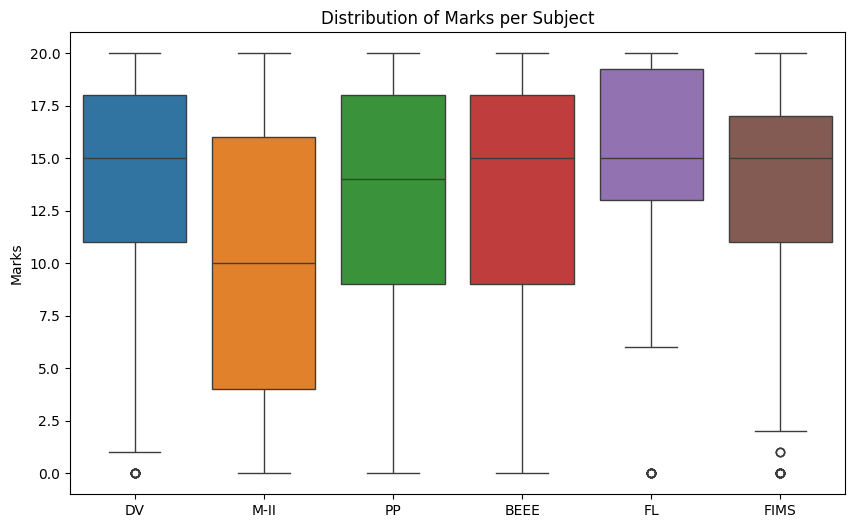

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(data=pandas_df[['DV','M-II','PP','BEEE','FL','FIMS']])
plt.title("Distribution of Marks per Subject")
plt.ylabel("Marks")
plt.show()

The boxplot shows how marks are spread out in each subject, including the highest, lowest, and the middle range of scores. A tall box means students’ marks vary a lot in that subject, while a short box means most students scored around the same level. If there are dots far below the box, those are outliers, meaning some students are struggling much more than others in that subject.
For management, this is a very helpful view. If a subject has a wide range of marks, it means teaching should be adjusted to support weaker students without slowing down those who are already strong. If many outliers appear at the lower end, special remedial sessions or mentoring programs can be introduced.

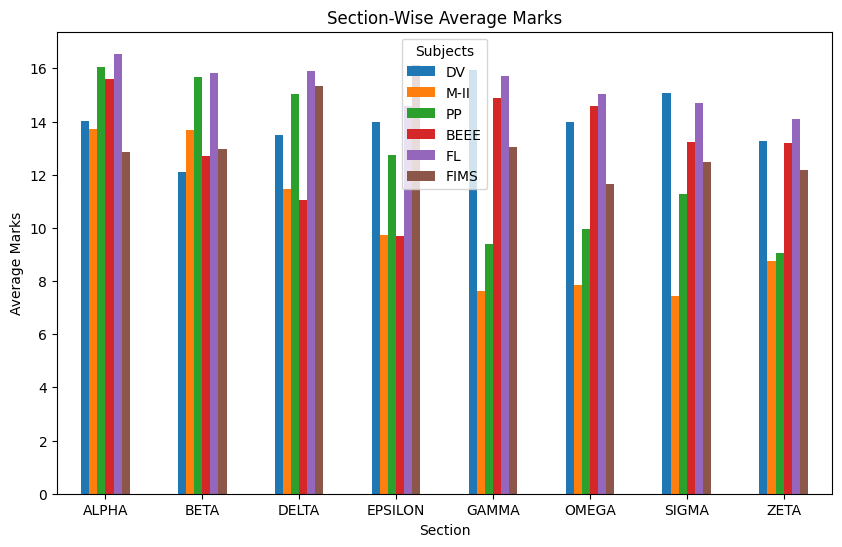

In [61]:
section_avg = pandas_df.groupby("SECTION")[['DV','M-II','PP','BEEE','FL','FIMS']].mean()
section_avg.plot(kind='bar', figsize=(10,6))
plt.title("Section-Wise Average Marks")
plt.xlabel("Section")
plt.ylabel("Average Marks")
plt.xticks(rotation=0)
plt.legend(title="Subjects")
plt.show()

This chart shows the average performance of each section across all subjects. It is clear which sections are performing strongly overall and which ones are lagging behind. If one section consistently has higher averages in most subjects, it may indicate better study habits, teaching methods, or classroom engagement. On the other hand, if a section is weaker across several subjects, it signals that the students in that section may need additional academic support.
For management, this information is valuable to maintain balance across sections. Extra attention can be given to sections with lower averages by arranging special coaching classes, mentorship programs, or more experienced faculty support.

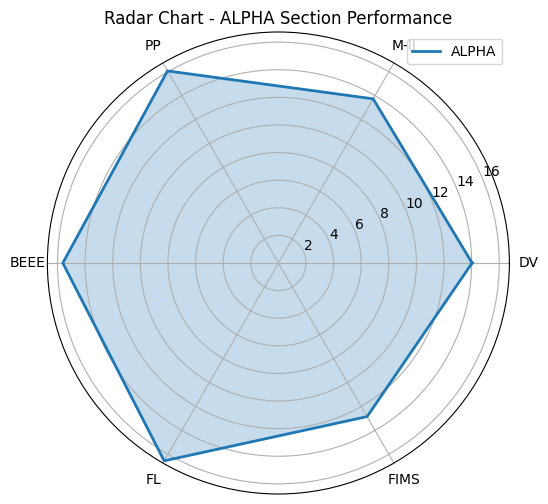

In [62]:
from math import pi
# Example for one section (ALPHA)
sec = 'ALPHA'
values = section_avg.loc[sec].values.flatten().tolist()
subjects = section_avg.columns.tolist()
N = len(subjects)
angles = [n / float(N) * 2 * pi for n in range(N)]
values += values[:1]
angles += angles[:1]
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], subjects)
ax.plot(angles, values, linewidth=2, linestyle='solid', label=sec)
ax.fill(angles, values, alpha=0.25)
plt.title(f"Radar Chart - {sec} Section Performance")
plt.legend(loc='upper right')
plt.show()


The radar chart shows the subject-wise performance of a single section (in this case, ALPHA). Each point on the chart represents the average marks of that section in a particular subject, and the overall shape highlights the section’s strengths and weaknesses. A subject where the line extends far out means students are performing strongly, while shorter points indicate weaker areas. For ALPHA, we can immediately see which subjects they excel in and which require more focus.
For management, this visualization is very useful to design targeted improvement plans. Instead of giving all subjects equal weight, focus can be placed on the subjects where the section is lagging. At the same time, strengths can be maintained and celebrated to keep student motivation high.

In [66]:
# Overall topper(s)
pandas_df['TOTAL'] = pandas_df[['DV','M-II','PP','BEEE','FL','FIMS']].sum(axis=1)
topper = pandas_df.loc[pandas_df['TOTAL'].idxmax()]
print("🏆 Overall Topper:")
print(topper[['SECTION','TOTAL']])

# Subject toppers
for subject in ['DV','M-II','PP','BEEE','FL','FIMS']:
    top_idx = pandas_df[subject].idxmax()
    print(f"Topper in {subject}: {pandas_df.loc[top_idx,'SECTION']} with {pandas_df.loc[top_idx,subject]} marks")

🏆 Overall Topper:
SECTION    None
TOTAL       120
Name: 471, dtype: object
Topper in DV: ALPHA with 20 marks
Topper in M-II: ALPHA with 20 marks
Topper in PP: ALPHA with 20 marks
Topper in BEEE: ALPHA with 20 marks
Topper in FL: ALPHA with 20 marks
Topper in FIMS: DELTA with 20 marks


**<span style="font-size:20px;">Insights & Conclusion:</span>**

**<span style="font-size:18px;">Insights :</span>**

Key Insights:
--> The subject with the highest average is identified as the strongest subject.       
--> The subject with the lowest average is the weakest subject and may need more focus.                
--> Section-wise performance shows which section performs best overall.                  
--> Radar chart highlights the subject-wise strengths of each section.                
--> Pass percentage gives a quick idea about overall performance quality.         
--> Overall topper and subject toppers are recognized.

**<span style="font-size:20px;">CONCLUSION :</span>**

This analysis provides a clear view of performance trends across subjects and sections.      From the analysis, it is clear that ZETA section has fewer students compared to others, while most sections like ALPHA, BETA, GAMMA, DELTA, EPSILON, OMEGA, and SIGMA are balanced with around 60 students each. Also, many students had missing or NULL section data, which needs proper record-keeping. To improve performance, the management should focus on sections where students are struggling in core subjects like DV and Programming, and arrange extra support sessions or remedial classes. This will help weaker students catch up and ensure overall improvement in results.
It can be used by teachers and management to improve teaching strategies and help students in weak areas.